## 단순선형회귀

In [22]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [2]:
boston = pd.read_csv("Boston_house.csv")

In [3]:
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [5]:
#Target이 예측할 변수
#Target 을 제외한 데이터만 뽑기
boston_data= boston.drop(['Target'],axis=1)

In [7]:
boston_data.describe()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,68.574901,356.674032,6.284634,3.613524,3.795043,11.136779,12.653063,0.554695,18.455534,9.549407,11.363636,408.237154,0.069170
std,28.148861,91.294864,0.702617,8.601545,2.105710,6.860353,7.141062,0.115878,2.164946,8.707259,23.322453,168.537116,0.253994
min,2.900000,0.320000,3.561000,0.006320,1.129600,0.460000,1.730000,0.385000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,45.025000,375.377500,5.885500,0.082045,2.100175,5.190000,6.950000,0.449000,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.500000,391.440000,6.208500,0.256510,3.207450,9.690000,11.360000,0.538000,19.050000,5.000000,0.000000,330.000000,0.000000
75%,94.075000,396.225000,6.623500,3.677082,5.188425,18.100000,16.955000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,396.900000,8.780000,88.976200,12.126500,27.740000,37.970000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000


In [11]:
target=boston[['Target']]

crim=boston[['CRIM']]
rm=boston[['RM']]
lstat=boston[['LSTAT']]

## target~crim 선형회귀

In [12]:
crim1=sm.add_constant(crim, has_constant="add")

In [16]:
model1=sm.OLS(target,crim1)
fitted_model1=model1.fit()

In [17]:
fitted_model1.summary() #R-square로 설명력(영향력) 보기

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Tue, 31 Mar 2020   Prob (F-statistic):           1.17e-19
Time:                        12:35:21   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.0331      0.409     58.740      0.000      23.229      24.837
CRIM          -0.4152      0.044     -9.460      0.000      -0.501      -0.329
==============================================================================
Omnibus:                      139.832   Durbin-Watson:                   0.713
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              295.404
Skew:                           1.490   Prob(JB):                     7.14e-65
Kurtosis:                       5.264   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
#회귀 계수 출력
fitted_model1.params

const    24.033106
CRIM     -0.415190
dtype: float64

In [19]:
#y_hat=beta0 + beta1*X 계산
np.dot(crim1,fitted_model1.params)

array([ 24.03048217,  24.02176733,  24.02177563,  24.01966646,
        24.00443729,  24.02071274,  23.99644902,  23.97309042,
        23.94540138,  23.96250722,  23.93973403,  23.98433377,
        23.99416963,  23.77163594,  23.76823138,  23.77261995,
        23.59552468,  23.70751396,  23.69982879,  23.73176107,
        23.51337514,  23.67934745,  23.52139661,  23.62271965,
        23.72160552,  23.68412214,  23.75413567,  23.63627976,
        23.71216824,  23.61689868,  23.56360486,  23.4706396 ,
        23.45682622,  23.55492323,  23.36347899,  24.00646341,
        23.99265003,  23.99983283,  23.96042712,  24.02163447,
        24.01915993,  23.98019433,  23.97435675,  23.96694145,
        23.98216648,  23.96193426,  23.95490093,  23.9379155 ,
        23.92770182,  23.94185981,  23.99626634,  24.01509937,
        24.01085198,  24.01242555,  24.02745959,  24.02766303,
        24.02457401,  24.02716065,  23.96898004,  23.99022532,
        23.97110996,  23.96181385,  23.98732314,  23.98

In [20]:
pred1=fitted_model1.predict(crim1)

In [21]:
pred1

0      24.030482
1      24.021767
2      24.021776
3      24.019666
4      24.004437
         ...    
501    24.007103
502    24.014311
503    24.007879
504    23.987605
505    24.013422
Length: 506, dtype: float64

## 다중선형회귀 

### crim,rm,lstat 세개의 변수를 통해 다중회귀적합 확인 

In [23]:
x_data=boston[['CRIM','RM','LSTAT']]

In [24]:
x_data1=sm.add_constant(x_data, has_constant="add")

In [26]:
#회귀모형적합
multimodel=sm.OLS(target,x_data)
fitted_multi_model=multimodel.fit()

In [27]:
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Target   R-squared (uncentered):                   0.949
Model:                            OLS   Adj. R-squared (uncentered):              0.949
Method:                 Least Squares   F-statistic:                              3149.
Date:                Tue, 31 Mar 2020   Prob (F-statistic):                        0.00
Time:                        15:37:17   Log-Likelihood:                         -1577.9
No. Observations:                 506   AIC:                                      3162.
Df Residuals:                     503   BIC:                                      3175.
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0999      0.032     -3.142      0.002      -0.162      -0.037
RM             4.8639      0.071     68.583      0.000       4.725       5.003
LSTAT         -0.6053      0.034    -17.653      0.000      -0.673      -0.538
==============================================================================
Omnibus:                      169.216   Durbin-Watson:                   0.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              582.348
Skew:                           1.536   Prob(JB):                    3.51e-127
Kurtosis:                       7.264   Cond. No.                         5.21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 단순선형회귀 모델과의 회귀계수 비교 결과 

In [28]:
print(fitted_multi_model.params)

CRIM    -0.099875
RM       4.863855
LSTAT   -0.605278
dtype: float64


In [32]:
#행렬 연산을 통해 beta구하기
from numpy import linalg

beta = linalg.inv(np.dot(x_data.T, x_data))
np.dot(x_data.T, x_data)

array([[ 43970.34355515,  10821.95113617,  37268.4186782 ],
       [ 10821.95113617,  20234.598247  ,  38681.78802   ],
       [ 37268.4186782 ,  38681.78802   , 106762.9583    ]])

In [33]:
pred_=fitted_multi_model.predict(x_data)

In [34]:
pred_

0      28.964933
1      25.695846
2      32.504804
3      32.254509
4      31.528945
         ...    
501    26.208104
502    24.266349
503    30.510418
504    29.111886
505    24.554721
Length: 506, dtype: float64

## 모든 변수를 통한 다중회귀 분석 

In [36]:
x_data2=boston[['AGE','B','RM','INDUS','LSTAT','CRIM','NOX','ZN','TAX']]

In [37]:
x_data2.head()

,AGE,B,RM,INDUS,LSTAT,CRIM,NOX,ZN,TAX
0,65.2,396.90,6.575,2.31,4.98,0.00632,0.538,18.0,296
1,78.9,396.90,6.421,7.07,9.14,0.02731,0.469,0.0,242
2,61.1,392.83,7.185,7.07,4.03,0.02729,0.469,0.0,242
3,45.8,394.63,6.998,2.18,2.94,0.03237,0.458,0.0,222
4,54.2,396.90,7.147,2.18,5.33,0.06905,0.458,0.0,222


In [38]:
x_data2_=sm.add_constant(x_data2, has_constant="add")

In [42]:
multimodel2=sm.OLS(target, x_data2_)
fitted_multimodel2=multimodel2.fit()

In [43]:
fitted_multimodel2.params

const   -7.108827
AGE      0.023619
B        0.008974
RM       5.092238
INDUS    0.029270
LSTAT   -0.565133
CRIM    -0.045293
NOX      3.483832
ZN       0.029377
TAX     -0.006025
dtype: float64

In [44]:
fitted_multimodel2.summary() 
#변수 4개의 변수의 다중회귀의 R-squred와 비교해볼때 별 차이가 없다.
#그만큼 다른 변수들이 서로 다중공산성을 ㅇ가짐. 즉, 4개의 변수로 회귀모델을 만드는 것이 더 좋다.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          5.76e-111
Time:                        16:40:32   Log-Likelihood:                -1565.5
No. Observations:                 506   AIC:                             3151.
Df Residuals:                     496   BIC:                             3193.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -7.1088      3.828     -1.857      0.064     -14.631       0.413
AGE            0.0236      0.014      1.653      0.099      -0.004       0.052
B              0.0090      0.003      2.952      0.003       0.003       0.015
RM             5.0922      0.458     11.109      0.000       4.192       5.993
INDUS          0.0293      0.065      0.449      0.654      -0.099       0.157
LSTAT         -0.5651      0.057     -9.854      0.000      -0.678      -0.452
CRIM          -0.0453      0.036     -1.269      0.205      -0.115       0.025
NOX            3.4838      3.833      0.909      0.364      -4.047      11.014
ZN             0.0294      0.013      2.198      0.028       0.003       0.056
TAX           -0.0060      0.002     -2.480      0.013      -0.011      -0.001
==============================================================================
Omnibus:                      195.490   Durbin-Watson:                   0.848
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              872.873
Skew:                           1.686   Prob(JB):                    2.87e-190
Kurtosis:                       8.479   Cond. No.                     1.04e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.04e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## VIF를 통한 다중 공산성 확인

In [46]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"]=[variance_inflation_factor(x_data2.values, i) for i in range(x_data2.shape[1])]
vif["features"] = x_data2.columns
vif #vif > 10이면 다중공산성을 가진 변수

,VIF Factor,features
0,18.457503,AGE
1,16.856737,B
2,46.535369,RM
3,12.642137,INDUS
4,8.844137,LSTAT
5,1.917332,CRIM
6,72.439753,NOX
7,2.086502,ZN
8,19.923044,TAX


In [47]:
#다중공산성이 가장 높은 Nox 변수 제거후 Vif 확인
vif = pd.DataFrame()
x_data_3 = x_data2.drop("NOX",axis=1)
vif["VIF Factor"]=[variance_inflation_factor(x_data_3.values, i) for i in range(x_data_3.shape[1])]
vif["features"] = x_data_3.columns
vif 

,VIF Factor,features
0,16.339792,AGE
1,16.735751,B
2,30.806301,RM
3,11.217461,INDUS
4,8.171214,LSTAT
5,1.916648,CRIM
6,2.074500,ZN
7,18.727105,TAX


In [48]:
x_data3_=sm.add_constant(x_data_3, has_constant="add")

multimodel3=sm.OLS(target, x_data3_)
fitted_multimodel3=multimodel3.fit()

In [49]:
fitted_multimodel3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.656
Method:                 Least Squares   F-statistic:                     121.6
Date:                Tue, 31 Mar 2020   Prob (F-statistic):          7.62e-112
Time:                        16:57:35   Log-Likelihood:                -1566.0
No. Observations:                 506   AIC:                             3150.
Df Residuals:                     497   BIC:                             3188.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.9162      3.596     -1.645      0.101     -12.981       1.149
AGE            0.0287      0.013      2.179      0.030       0.003       0.055
B              0.0087      0.003      2.880      0.004       0.003       0.015
RM             5.1027      0.458     11.138      0.000       4.203       6.003
INDUS          0.0486      0.062      0.789      0.431      -0.072       0.170
LSTAT         -0.5628      0.057     -9.825      0.000      -0.675      -0.450
CRIM          -0.0451      0.036     -1.264      0.207      -0.115       0.025
ZN             0.0284      0.013      2.130      0.034       0.002       0.055
TAX           -0.0056      0.002     -2.344      0.019      -0.010      -0.001
==============================================================================
Omnibus:                      193.530   Durbin-Watson:                   0.849
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              843.773
Skew:                           1.677   Prob(JB):                    5.98e-184
Kurtosis:                       8.364   Cond. No.                     8.44e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 학습 /검증데이터 분할 

In [59]:
from sklearn.model_selection import train_test_split

X= x_data2_
y= target

train_x , test_x, train_y, test_y = train_test_split(X,y,train_size=0.7 , random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(354, 10) (152, 10) (354, 1) (152, 1)


In [60]:
fit_split=sm.OLS(train_y, train_x)
fit_split=fit_split.fit()

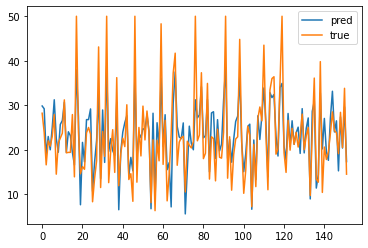

In [61]:
import matplotlib.pyplot as plt
plt.plot(np.array(fit_split.predict(test_x)), label="pred")
plt.plot(np.array(test_y), label="true")
plt.legend()
plt.show()

In [62]:
#변수 1개(Nox)제거한 변수들로 다중회귀

X= x_data3_
y= target

train_x2 , test_x2, train_y2, test_y2 = train_test_split(X,y,train_size=0.7 , random_state=1)
print(train_x2.shape, test_x2.shape, train_y2.shape, test_y2.shape)

(354, 9) (152, 9) (354, 1) (152, 1)


In [63]:
fit_split_2=sm.OLS(train_y2, train_x2)
fit_split_2=fit_split_2.fit()

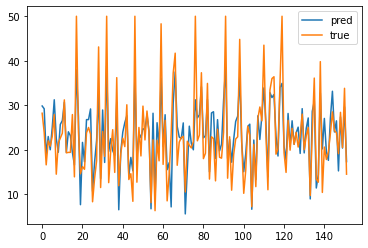

In [64]:
plt.plot(np.array(fit_split_2.predict(test_x2)), label="pred")
plt.plot(np.array(test_y2), label="true")
plt.legend()
plt.show()

## MSE를 통한 검증데이터에 대한 성능비교

In [65]:
from sklearn.metrics import mean_squared_error

In [66]:
mean_squared_error(y_true=test_y['Target'], y_pred=fit_split.predict(test_x))

26.148631468819765

In [67]:
mean_squared_error(y_true=test_y['Target'], y_pred=fit_split_2.predict(test_x2))
#MSE가 작아진 결과 확인

26.140062609846442

## 다중회귀를 통한 변수선택 

In [21]:
import os
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [22]:
corolla=pd.read_csv("ToyotaCorolla.csv")
corolla.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [23]:
#범주형 변수 => get dummies(이진형)으로 변환
nCar=corolla.shape[0]
nVar=corolla.shape[1]
corolla.Fuel_Type.unique()

dummpy_p=np.repeat(0,nCar)
dummpy_d=np.repeat(0,nCar)
dummpy_c=np.repeat(0,nCar)

In [24]:
p_inx=np.array(corolla.Fuel_Type=="Petrol")
d_inx=np.array(corolla.Fuel_Type=="Diesel")
c_inx=np.array(corolla.Fuel_Type=="CNG")

In [25]:
dummpy_p[p_inx]=1
dummpy_d[d_inx]=1
dummpy_c[c_inx]=1

In [26]:
#불필요한 변수 제거 및 가변수 추가

Fuel= pd.DataFrame({'Petrol': dummpy_p, 'Diesel': dummpy_d, 'CNG':dummpy_c})

In [27]:
Fuel

,Petrol,Diesel,CNG
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
1431,1,0,0
1432,1,0,0
1433,1,0,0
1434,1,0,0


In [28]:
corolla_=corolla.drop(['Id','Model','Fuel_Type'],axis=1, inplace=False)


In [30]:
mir_data=pd.concat((corolla_,Fuel),1)
mir_data

,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,Doors,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,13500,23,10,2002,46986,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
1,13750,23,10,2002,72937,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
2,13950,24,9,2002,41711,90,1,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
3,14950,26,7,2002,48000,90,0,0,2000,3,...,0,0,0,1,0,0,0,0,1,0
4,13750,30,3,2002,38500,90,0,0,2000,3,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,12,1998,20544,86,1,0,1300,3,...,0,1,1,1,0,0,0,1,0,0
1432,10845,72,9,1998,19000,86,0,0,1300,3,...,0,0,1,1,0,0,0,1,0,0
1433,8500,71,10,1998,17016,86,0,0,1300,3,...,0,0,0,1,0,0,0,1,0,0
1434,7250,70,11,1998,16916,86,1,0,1300,3,...,0,0,0,1,0,0,0,1,0,0


In [31]:
# bias 추가
mir_data=sm.add_constant(mir_data, has_constant="add")
mir_data

,const,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar,Petrol,Diesel,CNG
0,1.0,13500,23,10,2002,46986,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
1,1.0,13750,23,10,2002,72937,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
2,1.0,13950,24,9,2002,41711,90,1,0,2000,...,0,0,0,1,0,0,0,0,1,0
3,1.0,14950,26,7,2002,48000,90,0,0,2000,...,0,0,0,1,0,0,0,0,1,0
4,1.0,13750,30,3,2002,38500,90,0,0,2000,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1.0,7500,69,12,1998,20544,86,1,0,1300,...,0,1,1,1,0,0,0,1,0,0
1432,1.0,10845,72,9,1998,19000,86,0,0,1300,...,0,0,1,1,0,0,0,1,0,0
1433,1.0,8500,71,10,1998,17016,86,0,0,1300,...,0,0,0,1,0,0,0,1,0,0
1434,1.0,7250,70,11,1998,16916,86,1,0,1300,...,0,0,0,1,0,0,0,1,0,0


In [33]:
#X,Y분리 밑 학습데이터 평가데이터 분할

Feautre_columns=list(mir_data.columns.difference(['Price'])) #Y(Price)를 제외한 X

X=mir_data[Feautre_columns]
y=mir_data.Price

train_x , test_x, train_y, test_y = train_test_split(X,y,train_size=0.7 , random_state=1)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(1005, 37) (431, 37) (1005,) (431,)


In [34]:
# Train the MLR / 회귀모델적합
model_=sm.OLS(train_y,train_x)
fitted_model=model_.fit()

In [35]:
fitted_model.summary() ## R2가 높고, 대부분의 변수들이 유의

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.910
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     297.2
Date:                Wed, 01 Apr 2020   Prob (F-statistic):               0.00
Time:                        13:47:38   Log-Likelihood:                -8461.0
No. Observations:                1005   AIC:                         1.699e+04
Df Residuals:                     971   BIC:                         1.716e+04
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
ABS               -202.4540    137.381     -1.474      0.141    -472.052      67.144
Age_08_04         -119.6512      4.153    -28.808      0.000    -127.802    -111.501
Airbag_1           126.9969    295.899      0.429      0.668    -453.679     707.673
Airbag_2          -118.6408    141.548     -0.838      0.402    -396.415     159.133
Airco              225.2949     95.485      2.359      0.018      37.915     412.675
Automatic          530.3615    156.958      3.379      0.001     222.347     838.376
Automatic_airco   2340.4302    198.211     11.808      0.000    1951.459    2729.402
BOVAG_Guarantee    439.3210    137.858      3.187      0.001     168.787     709.855
Backseat_Divider   -56.5628    139.908     -0.404      0.686    -331.120     217.994
Boardcomputer     -395.3939    123.287     -3.207      0.001    -637.333    -153.454
CD_Player          188.3535    106.878      1.762      0.078     -21.385     398.092
CNG              -1953.8109    279.928     -6.980      0.000   -2503.145   -1404.477
Central_Lock        31.0129    160.947      0.193      0.847    -284.832     346.857
Cylinders           -0.0273      0.002    -11.292      0.000      -0.032      -0.023
Diesel            1696.6253    319.678      5.307      0.000    1069.286    2323.965
Doors              100.2012     43.590      2.299      0.022      14.660     185.743
Gears              -43.4054    203.815     -0.213      0.831    -443.374     356.563
Guarantee_Period    75.9339     14.803      5.130      0.000      46.884     104.984
HP                  53.5088      5.942      9.005      0.000      41.848      65.170
KM                  -0.0162      0.001    -11.832      0.000      -0.019      -0.014
Met_Color           21.1158     80.463      0.262      0.793    -136.785     179.016
Metallic_Rim       256.9483    102.169      2.515      0.012      56.451     457.446
Mfg_Month          -90.6048     10.989     -8.245      0.000    -112.169     -69.041
Mfg_Year             3.8468      0.892      4.314      0.000       2.097       5.597
Mfr_Guarantee      191.5132     78.667      2.434      0.015      37.136     345.891
Mistlamps            8.5371    114.245      0.075      0.940    -215.658     232.733
Petrol             257.1788    242.729      1.060      0.290    -219.155     733.513
Power_Steering    -330.0358    335.284     -0.984      0.325    -988.000     327.929
Powered_Windows    346.9541    160.822      2.157      0.031      31.355     662.553
Quarterly_Tax       14.8799      1.929      7.713      0.000      11.094      18.666
Radio             -465.0620    816.893     -0.569      0.569   -2068.142    1138.018
Radio_cassette     442.7284    819.165      0.540      0.589   -1164.809    2050.266
Sport_Model        370.3652     92.700      3.995      0.000     188.450     552.280
Tow_Bar           -117.

## 변수선택법

In [ ]:
def processSubset(X,y, feature_set):
            model = sm.OLS(y,X[list(feature_set)]) # Modeling
            regr = model.fit() # 모델 학습
            AIC = regr.aic # 모델의 AIC
            return {"model":regr, "AIC":AIC}
        
print(processSubset(X=train_x, y=train_y, feature_set = feature_columns[0:5]))

In [ ]:
processSubset(X=train_x, y=train_y, feature_set = feature_columns)

In [ ]:
import time
import itertools
# getBest: 가장 낮은 AIC를 가지는 모델 선택 및 저장
def getBest(X,y,k):
    tic = time.time() # 시작시간
    results = [] # 결과 저장공간
    for combo in itertools.combinations(X.columns.difference(['const']), k): # 각 변수조합을 고려한 경우의 수
        combo=(list(combo)+['const'])
        
        results.append(processSubset(X,y,feature_set=combo))  # 모델링된 것들을 저장
    models = pd.DataFrame(results) # 데이터 프레임으로 변환
    # 가장 낮은 AIC를 가지는 모델 선택 및 저장
    best_model = models.loc[models['AIC'].argmin()] # index
    toc = time.time() # 종료시간
    print("Processed ", models.shape[0], "models on", k, "predictors in", (toc - tic),
          "seconds.")
    return best_model

print(getBest(X=train_x, y=train_y,k=2))

In [ ]:
for combo in itertools.combinations(X.columns.difference(['const']), 2):
    print((list(combo)+['const']))

In [ ]:
# 변수 선택에 따른 학습시간과 저장
models = pd.DataFrame(columns=["AIC", "model"])
tic = time.time()
for i in range(1,4):
    models.loc[i] = getBest(X=train_x,y=train_y,k=i)
toc = time.time()
print("Total elapsed time:", (toc-tic), "seconds.")

In [ ]:
models

In [ ]:
# 모든 변수들 모델링 한것과 비교 
print("full model Rsquared: ","{:.5f}".format(fitted_full_model.rsquared))
print("full model AIC: ","{:.5f}".format(fitted_full_model.aic))
print("full model MSE: ","{:.5f}".format(fitted_full_model.mse_total))
print("selected model Rsquared: ","{:.5f}".format(models.loc[3, "model"].rsquared))
print("selected model AIC: ","{:.5f}".format(models.loc[3, "model"].aic))
print("selected model MSE: ","{:.5f}".format(models.loc[3, "model"].mse_total))

## 로지스틱 회귀분석 

In [ ]:
ploan = pd.read_csv("Personal Loan.csv")
ploan
'''
Experience 경력
Income 수입
Famliy 가족단위
CCAvg 월 카드사용량 
Education 교육수준 (1: undergrad; 2, Graduate; 3; Advance )
Mortgage 가계대출
Securities account 유가증권계좌유무
CD account 양도예금증서 계좌 유무
Online 온라인계좌유무
CreidtCard 신용카드유무 

'''

In [ ]:
# 의미없는 변수 제거
ploan_processed = ploan.dropna().drop(['ID','ZIP Code'], axis=1, inplace=False)

In [ ]:
ploan_processed = sm.add_constant(ploan_processed, has_constant='add')
ploan_processed

In [ ]:
feature_columns = list(ploan_processed.columns.difference(["Personal Loan"]))
X = ploan_processed[feature_columns]
y = ploan_processed['Personal Loan'] # 대출여부: 1 or 0

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, y, stratify=y,train_size=0.7,test_size=0.3,random_state=42)
print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

In [ ]:
model = sm.Logit(train_y, train_x)
results = model.fit(method='newton')

In [ ]:
results.summary()

In [ ]:
# performance measure
print("model AIC: ","{:.5f}".format(results.aic))

In [ ]:
## 나이가 한살 많을수록록 대출할 확률이 1.024 높다.
## 수입이 1단위 높을소룩 대출할 확률이 1.05배 높다 
## 가족 구성원수가 1많을수록 대출할 확률이 2.13배 높다
## 경력이 1단위 높을수록 대출할 확률이 0.99배 높다(귀무가설 채택)
# Experience,  Mortgage는 제외할 필요성이 있어보임
np.exp(results.params)

In [ ]:
pred_y = results.predict(test_x)
pred_y

In [ ]:
#회귀형태로 결과가 나오기 때문에 threshold 를 지정해서 분류로 변경해줘야 함.
def cut_off(y,threshold):
    Y = y.copy() # copy함수를 사용하여 이전의 y값이 변화지 않게 함
    Y[Y>threshold]=1
    Y[Y<=threshold]=0
    return(Y.astype(int))

pred_Y = cut_off(pred_y,0.5)
pred_Y

In [ ]:
#confusion Maxtrix(정확도 평가)
cfmat = confusion_matrix(test_y,pred_Y)
print(cfmat)

In [ ]:
def acc(cfmat) :
    acc=(cfmat[0,0]+cfmat[1,1])/np.sum(cfmat) ## accuracy
    return(acc)

In [ ]:
#threshold에 따른 성능지표 비교 #0.5~0.6에서 성능이 제일 좋음
threshold = np.arange(0,1,0.1)
table = pd.DataFrame(columns=['ACC'])
for i in threshold:
    pred_Y = cut_off(pred_y,i)
    cfmat = confusion_matrix(test_y, pred_Y)
    table.loc[i] = acc(cfmat)
table.index.name='threshold'
table.columns.name='performance'
table

In [ ]:
# sklearn ROC 패키지 제공
fpr, tpr, thresholds = metrics.roc_curve(test_y, pred_y, pos_label=1)

# Print ROC curve
plt.plot(fpr,tpr)

# Print AUC
auc = np.trapz(tpr,fpr)
print('AUC:', auc)